In [1]:
#preprocessing data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
data = pd.read_csv("wdbc.data", delimiter=",", header=None)

y = data[1]
x = data.drop(columns=[1])


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.7 , random_state = 0)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
classifier = Sequential()
#regularization(Dropout Method)
classifier.add(Dense(16, activation='relu', input_dim=31))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(16, activation='relu'))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(1, activation='sigmoid'))
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
output = classifier.fit(x_train, y_train , batch_size=32, epochs=5)

Epoch 1/5
6/6 [==============================] - 1s 4ms/step - loss: 0.7264 - accuracy: 0.5412
Epoch 2/5
6/6 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6412
Epoch 3/5
6/6 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.6941
Epoch 4/5
6/6 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7294
Epoch 5/5
6/6 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7941


In [10]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

13/13 [==============================] - 0s 1ms/step


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test, y_pred)


0.8446115288220551

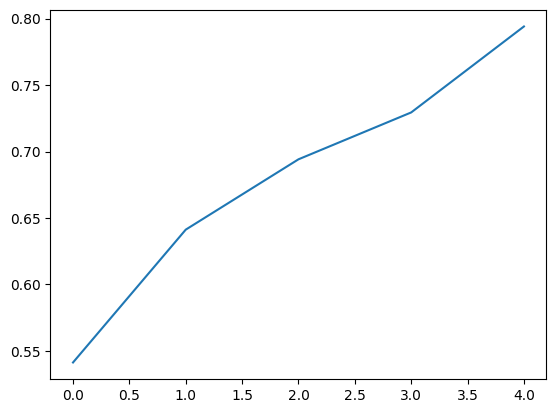

In [12]:
import matplotlib.pyplot as plt

plt.plot(output.history['accuracy'])
